In [1]:
import numpy as np
import pandas as pd
import os

# Diabetes Admision Dataset
Exercise:
In this dataset you have 3 different outputs:
No readmission;
A readmission in less than 30 days (this situation is not good, because maybe your treatment was not appropriate);
A readmission in more than 30 days (this one is not so good as well the last one, however, the reason could be the state of the patient.
Your task is either to classify a patient-hospital outcome or to cluster them aiming at finding patterns that give a distinct insight.
To do so, we suggest you create a notebook, like Jupyter (if you use python) or a Rmarkdown report (in case you use R) and make it available for us, i.e. github.
Hint to success in your quest: Develop and stay clear of the data science process you'll perform over the dataset and highlight important aspects you might consider affordable to discuss over.


# 1. Import Data.
There are two .csv files on the dataset.
- diabetic_data.csv
- IDs_mapping.csv

# For Repo Version
Data available [here](https://drive.google.com/drive/folders/1WRR5gJumyjMn7_k71WLcAV3XQzEk7bTN?usp=sharing}{here)

In [36]:
D_ROUTE = os.path.abspath(os.getcwd())
d_diabetes = pd.read_csv(f'{D_ROUTE}/Data/diabetic_data.csv')
IDS_map = pd.read_csv(f'{D_ROUTE}/Data/IDs_mapping.csv')

# 2. EDA.

In [37]:
d_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [38]:
d_diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [39]:
d_diabetes.sample(5).T

,91199,78626,66688,75258,31762
encounter_id,306095810,240389538,186509028,225382284,101771784
patient_nbr,41734287,91543068,5676993,44326494,55570122
race,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Male,Male,Female,Male,Female
age,[80-90),[60-70),[70-80),[70-80),[60-70)
weight,?,?,?,?,?
admission_type_id,3,3,6,3,6
discharge_disposition_id,1,1,6,1,6
admission_source_id,1,1,17,1,17
time_in_hospital,1,3,6,1,11


## 2.1 A closer look to the unique values on each column:

In [40]:
for col in d_diabetes.columns:
    print(col)
    print(d_diabetes[col].unique(), '\n')

encounter_id
[  2278392    149190     64410 ... 443854148 443857166 443867222] 

patient_nbr
[  8222157  55629189  86047875 ... 140199494 120975314 175429310] 

race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] 

gender
['Female' 'Male' 'Unknown/Invalid'] 

age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id
[6 1 2 3 4 5 8 7] 

discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] 

admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] 

time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 

payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR'] 

medical_specialty
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surger

## 2.2 Conclusions about the features:
1. `"?"` is the representation of the missing values, so it should be replacede by np.nan and explore what is the quality of the data.
2. `age` and `weight` need to be converted to numerical, ordinal variables.
3. `admission_type_id`, `discharge_disposition_id` and `admision_source_id` are categorical variables.
4. Important to explore features that doesnt change.
5. How many patients?


### 2.2.1 Missing Values.

In [54]:
d_diabetes = d_diabetes.replace('?', np.nan)

In [56]:
d_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  int64 
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [69]:
cols_a = ['medical_specialty', 'payer_code', 'weight']
def nans_report(df, l_o_col=None):
    
    t_len = len(df)
    r_dict = {}
    if l_o_col:
        l_col = l_o_col
    else:
        l_col = df.columns
    for col in l_col:
        p_nans = (1 - (t_len - df[col].isna().sum())/t_len)*100
        p_nans = format(p_nans, '.2f')
        r_dict[col] = p_nans
    
    df_o = pd.DataFrame(data=r_dict, index=[0])
    return df_o
df_nans = nans_report(d_diabetes, cols_a)

In [70]:
df_nans

,medical_specialty,payer_code,weight
0,49.08,39.56,96.86


### What about weight?
Despte weight being one of the most important parameters related to diabetes, the ammount of missing values is to much for taking into account for the analysis.

Also the features of medical_speciality, and payer_code have an importante percentage of missing values, so they will be drop in adittion to weight for now.

In [72]:
d_diabetes = d_diabetes.drop(cols_a, axis=1)

### 2.2.2 Change the type of `age`

In [43]:
# Chanche age to numerical.
d_diabetes['age'] = d_diabetes['age'].str[1:3]
d_diabetes['age'].value_counts()

70    26068
60    22483
50    17256
80    17197
40     9685
30     3775
90     2793
20     1657
10      691
0-      161
Name: age, dtype: int64

In [46]:
# Correct "0-"
d_diabetes.loc[d_diabetes['age'] == '0-', 'age'] = '0'

In [52]:
d_diabetes['age'] = d_diabetes['age'].astype('int64')
d_diabetes['age'].value_counts()

70    26068
60    22483
50    17256
80    17197
40     9685
30     3775
90     2793
20     1657
10      691
0       161
Name: age, dtype: int64

<AxesSubplot:>

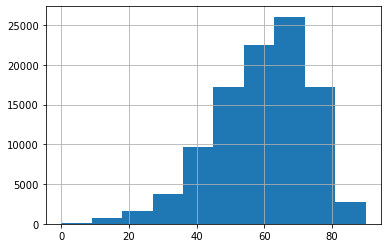

In [53]:
d_diabetes['age'].hist()

Age Distribution of Patients.

### 2.2.3 Correct the type of `admission_type_id`, `discharge_disposition_id` and `admision_source_id`

In [78]:
cols_corr = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
d_diabetes[cols_corr] = d_diabetes[cols_corr].astype('object')

### 2.2.4 Features that doesnt change or change only twice in all the data frame.

In [82]:
# first columns that dont change:
no_change_cols_1 = [i for i in list(d_diabetes) if len(d_diabetes[i].unique()) == 1]
no_change_cols_1

['examide', 'citoglipton']

In [83]:
no_change_cols_2 = [i for i in list(d_diabetes) if len(d_diabetes[i].unique()) == 2]
no_change_cols_2

['acetohexamide',
 'tolbutamide',
 'troglitazone',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

The Nature of the variables that only change 2 times in all the dataframe is related to the medications that where administrated, we can think that having only 3 possible outcomes we may be tempted to drop this values, but the issue here is that the cartesian product of this variables can give valueble insight on the possible outcome, i.e, on a given admission a patient could have one drug but not other, this can have a contribution on the final outcome, or related to posterior admissions.

Only the features of `examide` and `citoglipton` will be droped.

In [84]:
d_diabetes = d_diabetes.drop(no_change_cols_1, axis=1)

### 2.2.5 How many patients and how to treat outcomes that result in dead?
Now is important to know if the fact that a given patient has several admisions on the dataset will affect the outcome, and also what happened with the patients that died on a given admission?

- Patients that were admited several times should been seen has individual admitions, because the time between admitions should be independent of the outcome of each one of them, i.e. a possion distribution.

- On the medical vocabulary a Discharge Dispoisition that is related to "Expire" means that the patient has died during the admission, this also means that the patient will not be readmited in the future for logical reasons, so this feature can bias the model because it knows beforehand what is going to be the outcome. the `disrcharge_disposition_id` codes related to this scenario are 11, 19, 20, 21, and the bias can be proved by noticing that none of the addmisions related to this codes leads to readmision.

In [93]:
d_diabetes.loc[d_diabetes['discharge_disposition_id'].isin([11,19,20,21])]['readmitted'].unique()

array(['NO'], dtype=object)

In [98]:
# By comparision the discharge code "1" that means "Discharged to home" has 3 possible outcomes:
d_diabetes.loc[d_diabetes['discharge_disposition_id'].isin([1])]['readmitted'].unique()

array(['>30', 'NO', '<30'], dtype=object)

In [97]:
d_diabetes = d_diabetes.loc[~d_diabetes['discharge_disposition_id'].isin([11,19,20,21])]

In [117]:
d_diabetes.reset_index(inplace=True, drop=True)
d_diabetes['readmitted'].replace({'>30':0,'NO':1,'<30':2},
                                inplace=True)
d_diab_dum['readmitted'].value_counts(normalize=True)

1    0.531514
0    0.355045
2    0.113441
Name: readmitted, dtype: float64

# 3. Dummy and Dump the Data.
Now the categorical variables will be encoded using one-hot-method and then the data will be dumped to a .pickle file to read it on the next notebook "DiabetesModel.ipynb" that will implement statistical models to try to predict the probability of readmision.

In [118]:
d_diab_dum = pd.get_dummies(d_diabetes)
d_diab_dum.to_pickle('Data/d_diab_dum.pickle')

In [119]:
d_diab_dum_10 = d_diab_dum.sample(10000)

In [121]:
d_diab_dum_10.to_pickle('Data/d_diab_dum_10.pickle')

### Dump the data without diagnosis and outcome variables.

In [123]:
d_diab_no_diag = d_diabetes.drop(['diag_1',
                                  'diag_2',
                                  'diag_3',
                                  'discharge_disposition_id'], axis =1)

In [125]:
d_diab_no_diag10 =  d_diab_no_diag.sample(10000)
d_diab_no_diag10 = pd.get_dummies(d_diab_no_diag10)

d_diab_no_diag10.to_pickle('Data/d_diab_no_diag_10.pickle')

In [127]:
d_diab_no_diag10.shape

(10000, 111)